In [2]:
import pandas as pd 
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test

In [3]:
data = pd.read_csv("solder.csv")
data.head()

,Opening,Solder,Mask,PadType,Panel,skips
0,L,Thick,A1.5,W4,1,0
1,L,Thick,A1.5,W4,2,0
2,L,Thick,A1.5,W4,3,0
3,L,Thick,A1.5,D4,1,0
4,L,Thick,A1.5,D4,2,0


In [4]:
data.Solder.value_counts()

Solder
Thick    450
Thin     450
Name: count, dtype: int64

In [6]:
data.loc[data.Solder=="Thick","Solder"] = 0
data.loc[data.Solder=="Thin","Solder"] = 1
data.head()

# data["Solder"] = np.where(data["Solder"] == "Thin",1,0)

,Opening,Solder,Mask,PadType,Panel,skips
0,L,0,A1.5,W4,1,0
1,L,0,A1.5,W4,2,0
2,L,0,A1.5,W4,3,0
3,L,0,A1.5,D4,1,0
4,L,0,A1.5,D4,2,0


In [9]:
data.skips.value_counts()

skips
0     285
1     123
2      90
3      45
4      42
5      39
7      32
6      30
8      26
11     17
9      17
13     14
10     13
15     12
12     11
16      9
19      9
14      9
20      6
17      6
22      6
21      5
24      5
29      4
34      4
18      4
39      3
27      3
25      3
33      3
28      3
23      3
44      2
45      2
30      2
36      2
32      1
40      1
46      1
48      1
37      1
41      1
42      1
43      1
35      1
31      1
26      1
Name: count, dtype: int64

/home/harsh/Documents/Data mining/survival ananlysis/virtual_env/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<Axes: xlabel='timeline'>

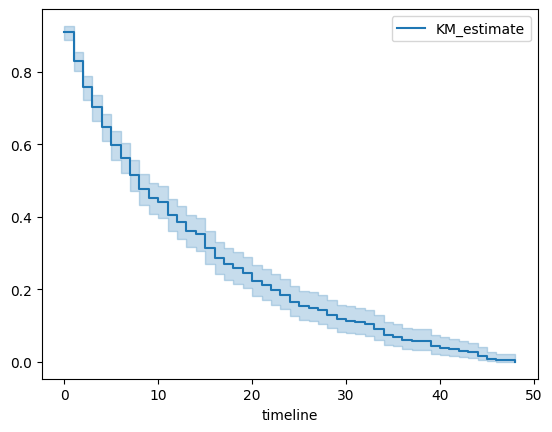

In [10]:
model = KaplanMeierFitter()
model.fit(durations=data.skips,event_observed=data.Solder)
model.plot()

In [11]:
multivariate_logrank_test(event_durations=data.skips,groups=data.Panel , event_observed= data.Solder)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           6.84 0.03      4.93